In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Just a formatting related plugin
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [4]:
import sys

sys.path.append("../")

<IPython.core.display.Javascript object>

In [5]:
from snpe.simulations.marketplace_simulator_class import MarketplaceSimulator
from collections import deque
from pathlib import Path

import numpy as np
import pandas as pd

from numpy.random import default_rng
from scipy.spatial.distance import cdist
from snpe.utils.statistics import review_histogram_means
import pyreadr

<IPython.core.display.Javascript object>

# Trying out marketplace simulations

In [6]:
params = {
    "review_prior": np.ones(5),
    "tendency_to_rate": 0.05,
    "simulation_type": "timeseries",
    "previous_rating_measure": "mode",
    "min_reviews_for_herding": 5,
    "num_products": 1400,
    "num_total_marketplace_reviews": 140_000,
    "consideration_set_size": 5,
}

<IPython.core.display.Javascript object>

In [7]:
simulator = MarketplaceSimulator(params)

<IPython.core.display.Javascript object>

In [ ]:
simulator.simulate(10)

Simulations:   0%|          | 0/10 [00:00<?, ?it/s]

In [12]:
len(simulator.simulations)

100

<IPython.core.display.Javascript object>

In [21]:
num_reviews = []
for sim in simulator.simulations:
    num_reviews += [len(prods) for prods in sim]
len(num_reviews)

2000

<IPython.core.display.Javascript object>

(array([703., 332., 270., 278., 203., 127.,  50.,  30.,   4.,   3.]),
 array([  6. ,  46.7,  87.4, 128.1, 168.8, 209.5, 250.2, 290.9, 331.6,
        372.3, 413. ]),
 <BarContainer object of 10 artists>)

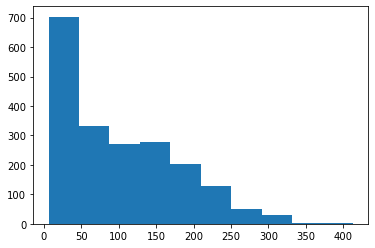

<IPython.core.display.Javascript object>

In [22]:
plt.hist(num_reviews)

In [19]:
type(simulator.simulations)

numpy.ndarray

<IPython.core.display.Javascript object>

# Count the number of products and reviews in the real marketplace

In [13]:
reviews = pyreadr.read_r(
    "/data/Dropbox/SNPE/all_data/reviews_bazaarvoice_main_vars.Rds"
)
reviews = reviews[None]
reviews.head()

,asin,overall,ReviewId,unixReviewTime,rootcategoryid
0,670155,4,3480905,2009-02-10,33005908
1,670155,3,3535864,2009-02-24,33005908
2,670155,5,3539112,2009-02-24,33005908
3,670155,4,3539514,2009-02-25,33005908
4,670155,1,3556157,2009-03-05,33005908


<IPython.core.display.Javascript object>

/root


<IPython.core.display.Javascript object>

# Testing out all the code

In [11]:
simulator.load_embedding_density_estimators(None)

<IPython.core.display.Javascript object>

In [12]:
num_simulations = 100
simulator.simulation_parameters = simulator.generate_simulation_parameters(
    num_simulations * simulator.num_products
)

<IPython.core.display.Javascript object>

In [13]:
simulator.simulation_parameters["h_p"].shape

(2000,)

<IPython.core.display.Javascript object>

In [14]:
total_visitors = simulator.num_total_marketplace_reviews * 30
total_visitors

60000

<IPython.core.display.Javascript object>

In [12]:
simulated_reviews = [
    deque([np.ones(5)], maxlen=total_visitors) for prod in range(simulator.num_products)
]

<IPython.core.display.Javascript object>

In [13]:
len(simulated_reviews)

2000

<IPython.core.display.Javascript object>

In [14]:
product_embeddings = simulator.embedding_density_estimators[
    "products"
].multivariate_normal(np.zeros(100), np.diag(np.ones(100)), size=simulator.num_products)

<IPython.core.display.Javascript object>

In [15]:
product_embeddings.shape

(2000, 100)

<IPython.core.display.Javascript object>

In [16]:
visitor_embedding = simulator.embedding_density_estimators[
    "visitors"
].multivariate_normal(np.zeros(100), np.diag(np.ones(100)))

<IPython.core.display.Javascript object>

In [17]:
visitor_embedding.shape

(100,)

<IPython.core.display.Javascript object>

In [18]:
cos_sim = 1.0 - cdist(
    product_embeddings, visitor_embedding.reshape(1, -1), metric="cosine"
)
cos_sim.shape

(2000, 1)

<IPython.core.display.Javascript object>

(array([  6.,  35., 135., 366., 491., 485., 300., 139.,  36.,   7.]),
 array([-0.33563476, -0.26806207, -0.20048938, -0.1329167 , -0.06534401,
         0.00222867,  0.06980136,  0.13737405,  0.20494673,  0.27251942,
         0.34009211]),
 <BarContainer object of 10 artists>)

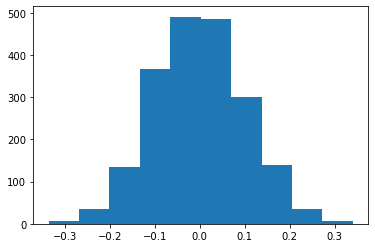

<IPython.core.display.Javascript object>

In [19]:
plt.hist(cos_sim)

In [21]:
consideration_set = np.argpartition(
    cos_sim.flatten(), -simulator.consideration_set_size
)[-simulator.consideration_set_size :]
consideration_set

array([1318,  496, 1450, 1221, 1383])

<IPython.core.display.Javascript object>

In [24]:
np.sort(cos_sim.flatten())[-5:]

array([0.29318424, 0.29486742, 0.3145481 , 0.3274308 , 0.34009211])

<IPython.core.display.Javascript object>

In [25]:
cos_sim = cos_sim.flatten()
cos_sim[consideration_set]

array([0.29318424, 0.29486742, 0.3145481 , 0.34009211, 0.3274308 ])

<IPython.core.display.Javascript object>

In [26]:
adj = np.random.random()
consideration_set_cos_sim = cos_sim[consideration_set]
consideration_set_cos_sim

array([0.29318424, 0.29486742, 0.3145481 , 0.34009211, 0.3274308 ])

<IPython.core.display.Javascript object>

In [27]:
consideration_set_reviews = np.array(
    [simulated_reviews[prod][-1] for prod in consideration_set]
)
consideration_set_reviews.shape

(5, 5)

<IPython.core.display.Javascript object>

In [28]:
consideration_set_reviews

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

<IPython.core.display.Javascript object>

In [29]:
consideration_set_avg_ratings = review_histogram_means(consideration_set_reviews)
consideration_set_avg_ratings

array([3., 3., 3., 3., 3.])

<IPython.core.display.Javascript object>

In [30]:
# Adjusting both cosine similarities and avg ratings to be on the same scale - 0 to 1
consideration_set_cos_sim = (consideration_set_cos_sim + 1.0) / 2.0
consideration_set_avg_ratings /= 5.0
print(consideration_set_cos_sim, consideration_set_avg_ratings)

[0.64659212 0.64743371 0.65727405 0.67004605 0.6637154 ] [0.6 0.6 0.6 0.6 0.6]


<IPython.core.display.Javascript object>

In [31]:
# Linear combination of cosine similarity and avg ratings using the adjuster
scores = (adj * consideration_set_cos_sim) + ((1 - adj) * consideration_set_avg_ratings)
scores

array([0.62198681, 0.62238395, 0.62702761, 0.63305471, 0.63006728])

<IPython.core.display.Javascript object>

In [33]:
# Calculate a shifted softmax to guard against over and underflow errors
# https://stackoverflow.com/questions/42599498/numercially-stable-softmax
exps = np.exp(scores - np.max(scores))
choice_p = exps / np.sum(exps)
print(choice_p)
# Finally pick a product according to these choice probabilities
choice_index = np.where(np.random.multinomial(1, choice_p))[0][0]
print(choice_index)

[0.19901712 0.19909618 0.20002286 0.20123206 0.20063179]
4


<IPython.core.display.Javascript object>

In [34]:
consideration_set[choice_index]

1383

<IPython.core.display.Javascript object>

In [38]:
chosen_product = simulator.multinomial_choice(
    consideration_set, cos_sim, simulated_reviews
)
chosen_product

496

<IPython.core.display.Javascript object>

In [39]:
chosen_product = simulator.simulate_visitor_choice(
    product_embeddings, simulated_reviews
)

<IPython.core.display.Javascript object>

In [40]:
chosen_product

625

<IPython.core.display.Javascript object>

In [41]:
simulation_id = (0 * simulator.num_products) + chosen_product
simulation_id

625

<IPython.core.display.Javascript object>

In [42]:
simulated_reviews[chosen_product][-1]

array([1., 1., 1., 1., 1.])

<IPython.core.display.Javascript object>

In [47]:
rating_index = simulator.simulate_visitor_journey(
    simulated_reviews[chosen_product][-1], simulation_id, False
)
rating_index

0

<IPython.core.display.Javascript object>

In [15]:
a = simulator.simulate_marketplace(1)

../snpe/simulations/marketplace_simulator_class.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([np.array(timeseries) for timeseries in simulated_reviews])


<IPython.core.display.Javascript object>

(array([6., 3., 1., 2., 0., 1., 2., 2., 1., 2.]),
 array([  8. ,  31.1,  54.2,  77.3, 100.4, 123.5, 146.6, 169.7, 192.8,
        215.9, 239. ]),
 <BarContainer object of 10 artists>)

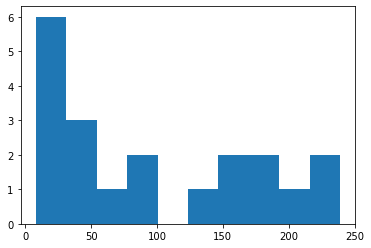

<IPython.core.display.Javascript object>

In [21]:
plt.hist([len(a[i]) for i in range(len(a))])

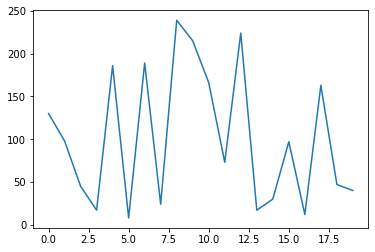

<IPython.core.display.Javascript object>

In [22]:
plt.plot([len(a[i]) for i in range(len(a))])

In [23]:
np.sum([len(a[i]) for i in range(len(a))])

2020

<IPython.core.display.Javascript object>